# Roll No : 2022201060 CV-ASSIGNMENT 4 PART2
# Q2: Contrastive Language-Image Pretraining
## 1. Setup models. Load the ResNet-50 (RN50) model, initialized in two different ways:
(a) ImageNet pretraining (torchvision.models can be used, specifically look at IMAGENET1K_V1); and 
(b) OpenAI’s CLIP (see https://github.com/openai/CLIP).

Do the visual encoders have the same architecture? If not, please describe and explain the differences.
Hint: When you load the CLIP model, you will get both the vision and text encoders - be sure to differentiate between them as necessary.

In [1]:
import torchvision.models as models
import torch
!pip install git+https://github.com/openai/CLIP.git 
import clip
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-77tfsdof
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-77tfsdof
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=0696d456430fafdad361f1c7cca041d46e40e8a8de2e925033a20460f9d779ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-cmt08lfn/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Selected device:", device)

Selected device: cpu


In [3]:
resnet_imagenet = models.resnet50(pretrained=True)
resnet_imagenet.eval()  

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 101MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
clip_model, preprocess = clip.load("RN50", device = device)
clip_model.eval() 

100%|███████████████████████████████████████| 244M/244M [00:13<00:00, 19.4MiB/s]


CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

In [5]:
imagenet_visual_encoder = resnet_imagenet
clip_visual_encoder = clip_model.visual

# Check if the architectures are the same
if isinstance(imagenet_visual_encoder, torch.nn.Module) and isinstance(clip_visual_encoder, torch.nn.Module):
    same_architecture = torch.all(torch.tensor([p1.numel() for p1, p2 in zip(imagenet_visual_encoder.parameters(), clip_visual_encoder.parameters())]) == 0)
    if same_architecture:
        print("The visual encoders have the same architecture.")
    else:
        print("The visual encoders have different architectures.")

The visual encoders have different architectures.


### Question: Do the visual encoders have the same architecture? If not, please describe and explain the differences.

### Answer:
No, the visual encoders in the ResNet architecture do not have identical architectures. While they share common initial layers such as convolutional layers, batch normalization, ReLU activation, and max-pooling, there are notable differences between the encoders used for image classification and object detection tasks.

Both encoders follow a similar structure up to the end of "layer3," which includes several bottleneck blocks. However, the object detection encoder diverges by including an additional set of bottleneck blocks in "layer4." These extra blocks enable the object detection encoder to capture more nuanced and detailed features from input images, which is essential for accurately identifying objects in complex scenes.

In summary, while the fundamental structure of the visual encoders is similar, the object detection encoder incorporates supplementary layers to enhance its feature extraction capabilities, making it better suited for object detection tasks compared to the image classification encoder.

## 2.  Setup data. Understand the ImageNet challenge dataset (1000 labels of ILSVRC).
(i) What label hierarchy is used in ImageNet? 

(ii) What does a synset mean? 

(iii) Could grouping objects based on synsets lead to problems for visual recognition? 

(iv) State 3 types of visual differences we can expect to see in images with objects corresponding to the same synset.

### Answers : 
**(i) Label Hierarchy in ImageNet:**
ImageNet organizes its labels using a system called WordNet, which groups words into sets known as synsets. These synsets represent concepts or objects. There are approximately 80,000 synsets in WordNet. For each synset, ImageNet aims to have 500 to 1000 images, and each image is checked by humans to ensure it accurately represents the label. This organization helps maintain consistency and clarity in categorizing and retrieving images based on their content.

**(ii) Meaning of Synset:**
In the context of ImageNet, a synset refers to a group of words or phrases that are synonymous or semantically related. Each synset represents a specific concept or category, forming the basis of the label hierarchy in the dataset. Synsets help standardize the labeling process and enable efficient organization and retrieval of image data.

**(iii) Challenges of Grouping Objects Based on Synsets:**
Grouping objects based solely on synsets can pose challenges for visual recognition tasks. One potential issue is the ambiguity of synsets, where a single synset may encompass multiple senses of a word. This ambiguity can lead to confusion in visual recognition, particularly when images lack contextual cues to distinguish between different senses. Additionally, synsets can be quite fine-grained, containing specific concepts that may not be easily distinguishable visually, leading to potential classification errors.

**(iv) Types of Visual Differences:**
Despite belonging to the same synset, images of objects can exhibit various visual differences, including:
1. **Shape Variances:** Objects can vary in shape, including differences in size, geometry, or structural features, even within the same synset.
2. **Color Variations:** Objects within the same synset may display differences in color, such as variations in shades, hues, or color patterns.
3. **Texture Discrepancies:** Images may exhibit differences in texture, such as smoothness, roughness, or patterns, depending on the specific object depicted. These visual differences highlight the diversity and complexity inherent in objects classified under the same synset in the ImageNet dataset.

## 3 Setup zero-shot CLIP. Similar to the ImageNet pretrained RN50, set up CLIP to generate probability scores for the 1000 ImageNet categories.
Test it with a few example images to check that it identifies the correct object category. Hint: You may treat the cosine similarities as “logits”.

In [6]:
def load_synset_mapping(mapping_file_path):
    synset_mapping = {}
    with open(mapping_file_path) as file:
        for line in file:
            key_length = len(line.strip().split(" ")[0])
            synset = line.strip().split(" ")[0]
            labels = line.strip()[key_length + 1:].strip().split(",")
            synset_mapping[synset] = labels
    return synset_mapping

In [7]:
labels_mapping_file_path = "/kaggle/input/val-labels/LOC_synset_mapping.txt"
synset_mapping = load_synset_mapping(labels_mapping_file_path)

In [8]:
print("Number of keys in synset_mapping:", len(synset_mapping.keys()))

# Print some of the sample labels 
count = 0
for key, value in synset_mapping.items():
    print(key, value)
    count += 1
    if count >= 5:
        break


Number of keys in synset_mapping: 1000
n01440764 ['tench', ' Tinca tinca']
n01443537 ['goldfish', ' Carassius auratus']
n01484850 ['great white shark', ' white shark', ' man-eater', ' man-eating shark', ' Carcharodon carcharias']
n01491361 ['tiger shark', ' Galeocerdo cuvieri']
n01494475 ['hammerhead', ' hammerhead shark']


In [9]:
def load_image_from_category(imageNetminipath, category_idx):
    # Define the paths
    traindir = os.path.join(imageNetminipath, "train")
    valdir = os.path.join(imageNetminipath, "val")
    
    # Get the list of categories (folders) in the training directory
    traindir_fns = os.listdir(traindir)
    traindir_fns.sort()
    
    # Choose the category directory based on the provided index
    imgCatdir = os.path.join(traindir, traindir_fns[category_idx])
    
    # Get the list of image file names in the chosen category directory
    imgNames = os.listdir(imgCatdir)
    
    # Construct the full paths of the images in the chosen category
    imagePaths = [os.path.join(imgCatdir, img) for img in imgNames]
    
    # Load and display the first image in the chosen category
    img = Image.open(imagePaths[0]).convert("RGB")
    plt.imshow(img)
    plt.show()
    
    # Print the synset label of the chosen category
    print("Synset label of the chosen category:", synset_mapping[traindir_fns[category_idx]])
    return imagePaths


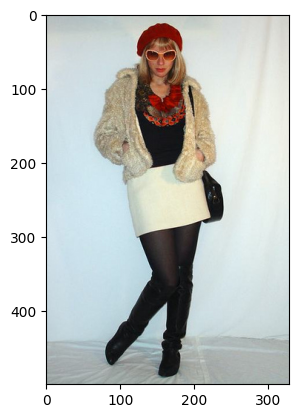

Synset label of the chosen category: ['miniskirt', ' mini']


In [10]:
miniImagenet_file  = "/kaggle/input/imagenetmini-1000/imagenet-mini"
imagePaths = load_image_from_category(miniImagenet_file, 655)

In [11]:
def predict_label(image_path, text_list, model_clip, preprocess, device):
    img = Image.open(image_path).convert("RGB")
    preprocessed_image = preprocess(img).unsqueeze(0).to(device)
    image_features = model_clip.encode_image(preprocessed_image)

    text_tokens = clip.tokenize(text_list).to(device)
    text_features = model_clip.encode_text(text_tokens)

    logits_per_image, _ = model_clip(preprocessed_image, text_tokens)
    probs = logits_per_image.softmax(dim=-1).cpu().detach().numpy()

    predicted_label = text_list[probs.argmax()]

    return probs, predicted_label


In [12]:
clip_model, preprocess = clip.load("RN50", device = device)
text_labels = [
    "woman",
    "girl",
    "Skirt",
    "feminine clothing",
    "fashionable woman",
    "stylish girl",
    "ladylike attire",
    "female fashion",
    "girly outfit",
    "woman's fashion",
    "girl's attire"
]

probs, predicted_label = predict_label(imagePaths[0], text_labels, clip_model, preprocess, device)
print(probs)
print("Predicted Label: ", predicted_label)

[[0.01576318 0.00327834 0.00239115 0.01544653 0.35084602 0.06748634
  0.08492531 0.1460938  0.11562527 0.15259828 0.04554576]]
Predicted Label:  fashionable woman


In [13]:
for label, prob in zip(text_labels, probs[0]):
    print(f"Probability for {label}: {prob:.4f}")
    
print("--------- ** -----------")
print("Predicted Label: ", predicted_label)


Probability for woman: 0.0158
Probability for girl: 0.0033
Probability for Skirt: 0.0024
Probability for feminine clothing: 0.0154
Probability for fashionable woman: 0.3508
Probability for stylish girl: 0.0675
Probability for ladylike attire: 0.0849
Probability for female fashion: 0.1461
Probability for girly outfit: 0.1156
Probability for woman's fashion: 0.1526
Probability for girl's attire: 0.0455
--------- ** -----------
Predicted Label:  fashionable woman


## 4. CLIP vs ImageNet pretraining. Pick 10 classes from ImageNet (not all from the same branch, e.g., not all dogs). For each class:
### (i) Find 2 images that work well with CLIP, but not with ImageNet pretrained RN50. Reason about why this may be the case. From where did you get these images?
Hint: Reading the CLIP paper (https://arxiv.org/abs/2103.00020) can help you solve this question quickly as it shows examples where ImageNet does not work, but CLIP works.

In [14]:

classes_file_path = "/kaggle/input/imagenet-classes/imagenet_classes.txt"

# Read the file
with open(classes_file_path, "r") as file:
    class_labels = file.readlines()
class_labels = [class_name.strip() for class_name in class_labels]
# Print some class labels and size
print("Total number of class labels:", len(class_labels))
print("Sample class labels:")
for i in range(10):  # Print first 10 class labels
    print(class_labels[i].strip())  # Strip to remove newline characters


Total number of class labels: 1000
Sample class labels:
tench
goldfish
great white shark
tiger shark
hammerhead
electric ray
stingray
cock
hen
ostrich


In [23]:
def get_clip_prediction(clip_model, preprocess, image, class_name,tokenized_text):
    # Generate a default text input
    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Encode the image
    image_features = clip_model.encode_image(image_input)
    
    logits_per_image, _ = clip_model(image_input, tokenized_text)  # Include the tokenized text input
    probs = logits_per_image.softmax(dim=-1).cpu().detach().numpy()
#     print(probs)
    # Get the predicted class index and probability
    predicted_class_index = probs.argmax().item()
    predicted_probability = logits_per_image.softmax(dim=-1).max().item()

    return predicted_class_index, predicted_probability


def get_rn50_prediction(resnet_model, image):
    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Perform inference using the ResNet-50 model
    with torch.no_grad():
        output = resnet_model(image_input)
#     print(output.size())
    # Get the predicted class index and probability
    _, predicted_class_index = output.max(1)
    predicted_probability = torch.nn.functional.softmax(output, dim=1)[0, predicted_class_index].item()

    return predicted_class_index.item(), predicted_probability



def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

def find_images_with_different_predictions(classes, path_to_images_folder, clip_model, preprocess, resnet_imagenet, classes_file_path,tokenized_text):
    # Load ImageNet class labels
    with open(classes_file_path, "r") as file:
        imagenet_classes = file.readlines()
    imagenet_classes = [class_name.strip() for class_name in imagenet_classes]
#     print(imagenet_classes)

    for class_name in classes:
        class_folder = os.path.join(path_to_images_folder, class_name)
        class_images = os.listdir(class_folder)
        
#         random_images = random.sample(class_images, 2)
        random_images = class_images
        
        for image_name in random_images:
            image_path = os.path.join(class_folder, image_name)
            image = preprocess_image(image_path)
            
            clip_prediction, clip_prob = get_clip_prediction(clip_model, preprocess, image,class_name, tokenized_text)
            rn50_prediction, rn50_prob = get_rn50_prediction(resnet_imagenet, image)
            
            if clip_prediction != rn50_prediction:
                # Get the label for the predicted class index
                clip_label = classes[clip_prediction]
                rn50_label = imagenet_classes[rn50_prediction]
                
                # Display the image
                plt.imshow(image)
                plt.axis('off')
                plt.show()
                
                print(f"Class: {class_name}, Image: {image_name}")
                print(f"CLIP Prediction: {clip_label}, Probability: {clip_prob:.4f}")
                print(f"RN50 Prediction: {rn50_label}, Probability: {rn50_prob:.4f}")
                print("\n")


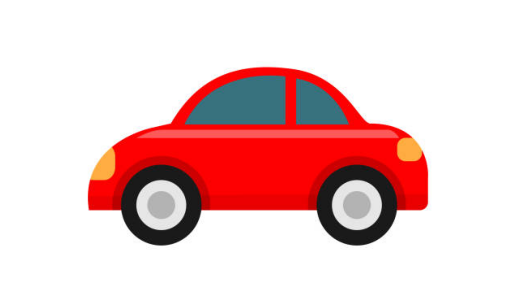

Class: car, Image: car2.jpeg
CLIP Prediction: car, Probability: 0.9979
RN50 Prediction: go-kart, Probability: 0.2135




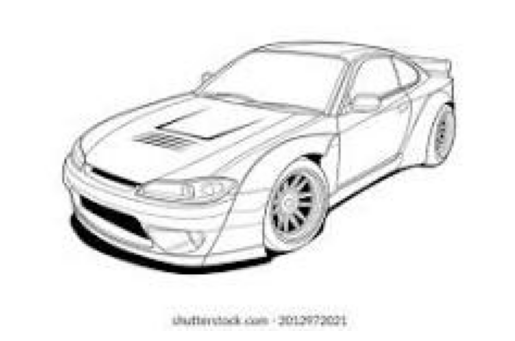

Class: car, Image: car1.jpeg
CLIP Prediction: car, Probability: 0.9871
RN50 Prediction: sports car, Probability: 0.2226




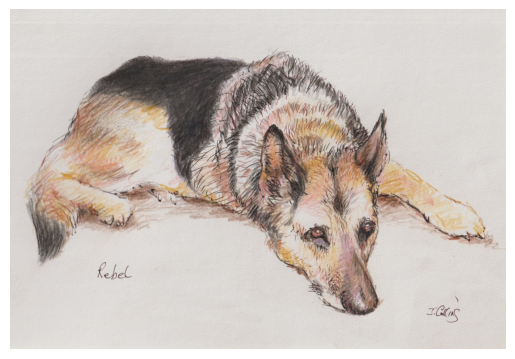

Class: dog, Image: dog2.jpeg
CLIP Prediction: dog, Probability: 0.8854
RN50 Prediction: German shepherd, Probability: 0.7850




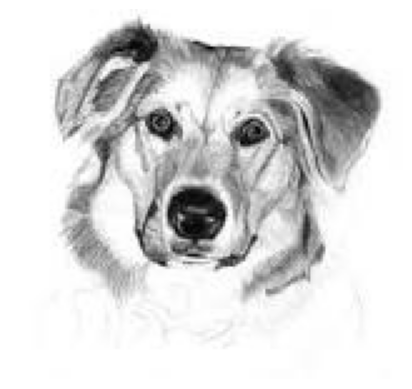

Class: dog, Image: dog1.jpeg
CLIP Prediction: dog, Probability: 0.9173
RN50 Prediction: Border collie, Probability: 0.1990




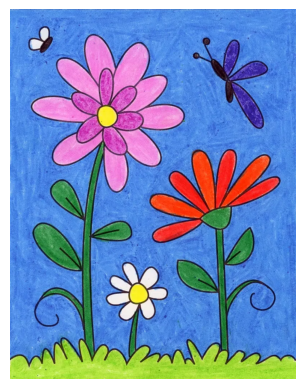

Class: flower, Image: flower2.webp
CLIP Prediction: flower, Probability: 0.9523
RN50 Prediction: pillow, Probability: 0.8295




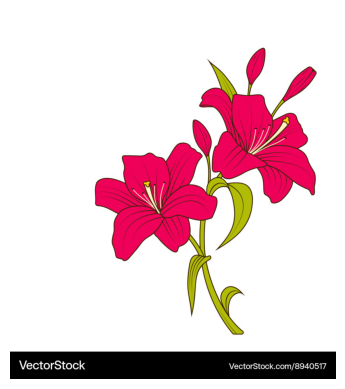

Class: flower, Image: flower1.jpeg
CLIP Prediction: flower, Probability: 0.9876
RN50 Prediction: envelope, Probability: 0.7192




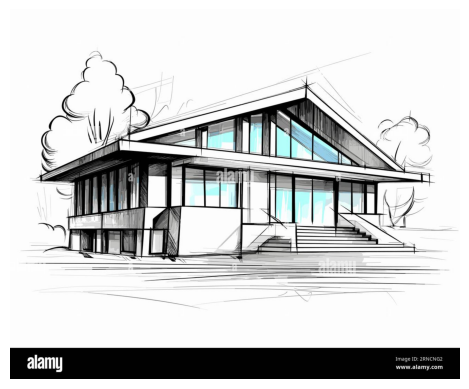

Class: building, Image: nbuilding.jpeg
CLIP Prediction: building, Probability: 0.9960
RN50 Prediction: boathouse, Probability: 0.3816




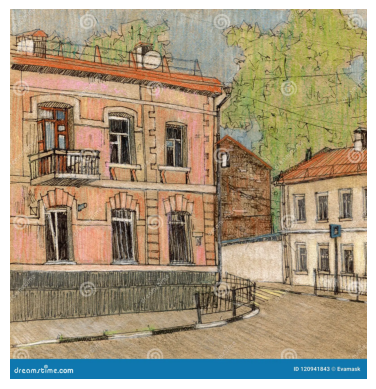

Class: building, Image: building2.webp
CLIP Prediction: building, Probability: 0.9766
RN50 Prediction: palace, Probability: 0.3863




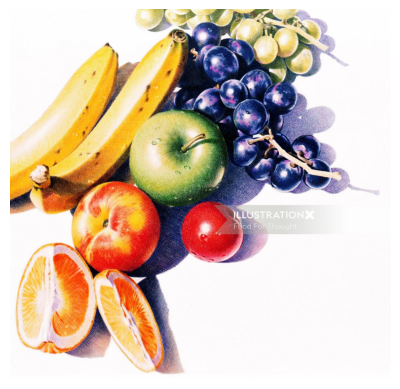

Class: fruit, Image: fruits1.jpeg
CLIP Prediction: fruit, Probability: 0.9382
RN50 Prediction: banana, Probability: 0.5716




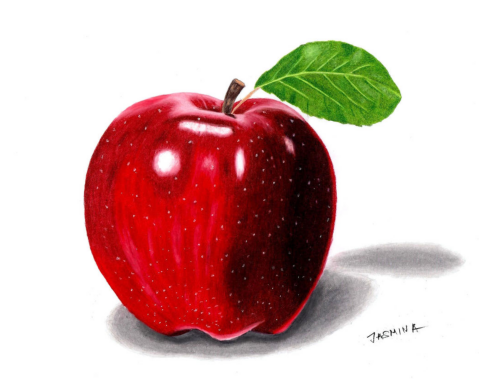

Class: fruit, Image: fruit2.jpeg
CLIP Prediction: fruit, Probability: 0.9654
RN50 Prediction: fig, Probability: 0.5214




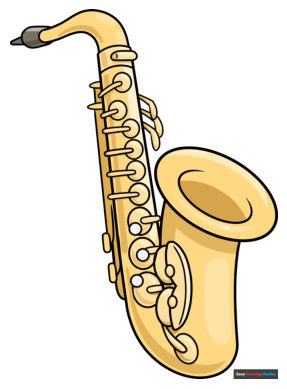

Class: instrument, Image: instrument2.webp
CLIP Prediction: instrument, Probability: 0.9995
RN50 Prediction: vase, Probability: 0.1236




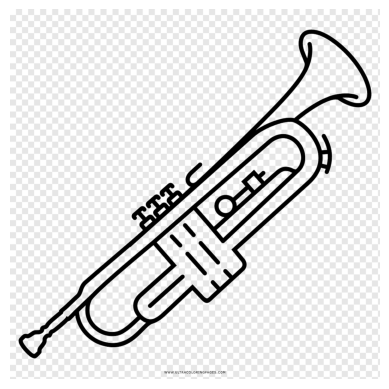

Class: instrument, Image: instrument1.png
CLIP Prediction: instrument, Probability: 0.9751
RN50 Prediction: hook, Probability: 0.1370




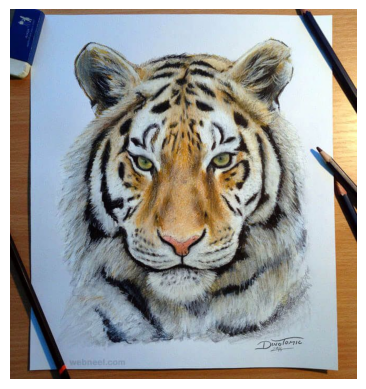

Class: animal, Image: animal1.jpeg
CLIP Prediction: animal, Probability: 0.9111
RN50 Prediction: tiger, Probability: 0.5091




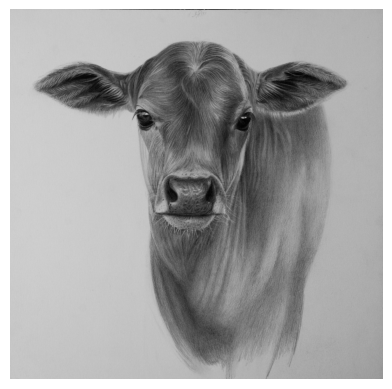

Class: animal, Image: animal2.jpeg
CLIP Prediction: animal, Probability: 0.9313
RN50 Prediction: ox, Probability: 0.7437




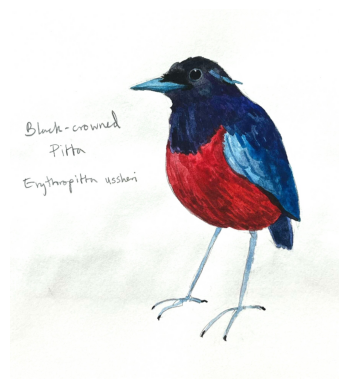

Class: bird, Image: bird2.jpeg
CLIP Prediction: bird, Probability: 0.9973
RN50 Prediction: bee eater, Probability: 0.2298




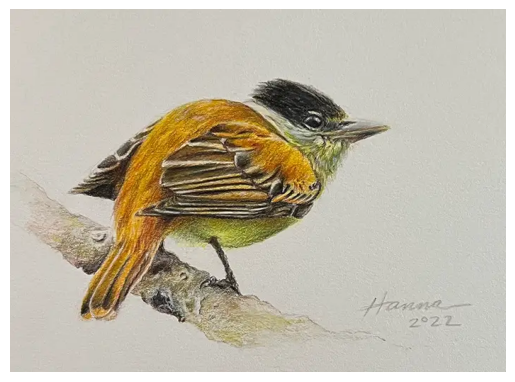

Class: bird, Image: bird1.webp
CLIP Prediction: bird, Probability: 0.8005
RN50 Prediction: bee eater, Probability: 0.5552




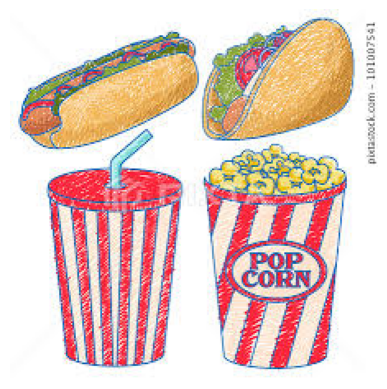

Class: food, Image: food2.jpeg
CLIP Prediction: food, Probability: 0.9246
RN50 Prediction: clog, Probability: 0.4829




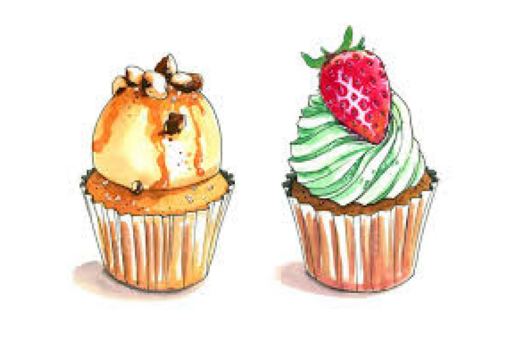

Class: food, Image: food1.jpeg
CLIP Prediction: food, Probability: 0.6258
RN50 Prediction: saltshaker, Probability: 0.2709




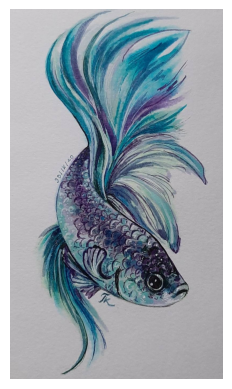

Class: fish, Image: fish1.jpeg
CLIP Prediction: fish, Probability: 0.9938
RN50 Prediction: quill, Probability: 0.3204




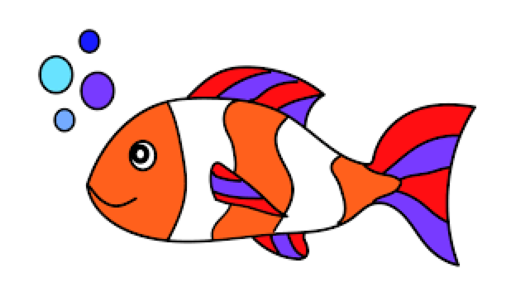

Class: fish, Image: fish2.png
CLIP Prediction: fish, Probability: 0.9933
RN50 Prediction: comic book, Probability: 0.1083




In [24]:
path_to_images_folder= "/kaggle/input/class-images/Class_Data"
classes = [
    "car",
    "dog",
    "flower",
    "building",
    "fruit",
    "instrument",
    "animal",
    "bird",
    "food",
    "fish"
]

clip_model, preprocess = clip.load("RN50", device = device)
clip_model.eval() 
tokenized_text = clip.tokenize(classes).to(device)
resnet_imagenet = models.resnet50(pretrained=True)
resnet_imagenet.eval()  
find_images_with_different_predictions(classes, path_to_images_folder, clip_model, preprocess, resnet_imagenet, classes_file_path,tokenized_text)

### (ii) Find 1 image that works well with ImageNet pretraining but not CLIP. Reason about why this may be the case. From where did you get these images?
Note: For the purpose of this question, we will say that the model “works well” if it generates the correct category label within the top-5 highest scoring labels.